# PCA

### Perform Principal component analysis and perform clustering using first 
3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)df


In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the data
df = pd.read_csv("C:\\Users\\SHUBHAM GARKAL\\Downloads\\wine.csv")

In [3]:
# Dropping the 'Type' column for analysis
X = df.drop('Type', axis=1)

In [4]:
# Perform PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)

In [5]:
# Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg_clustering.fit_predict(principalComponents)

In [6]:
# Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg_clustering.fit_predict(principalComponents)

In [7]:
# K-means Clustering
kmeans_scores = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(principalComponents)
    kmeans_scores.append(kmeans.inertia_)

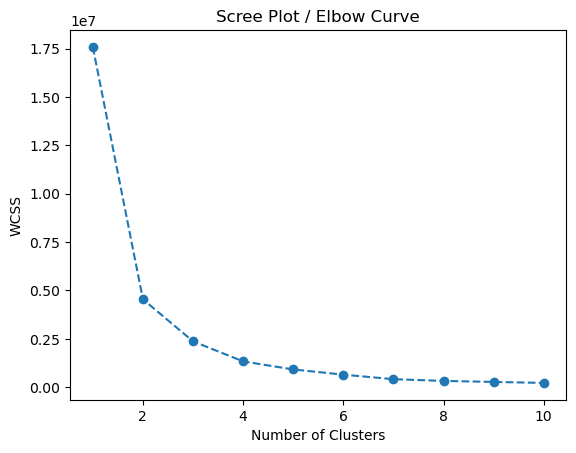

In [8]:
# Plotting the scree plot or elbow curve
plt.plot(range(1, 11), kmeans_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Scree Plot / Elbow Curve')
plt.show()

In [9]:
# Optimal number of clusters using Elbow Method
optimal_clusters = 3  # As per the elbow curve, it seems the optimal number is 3

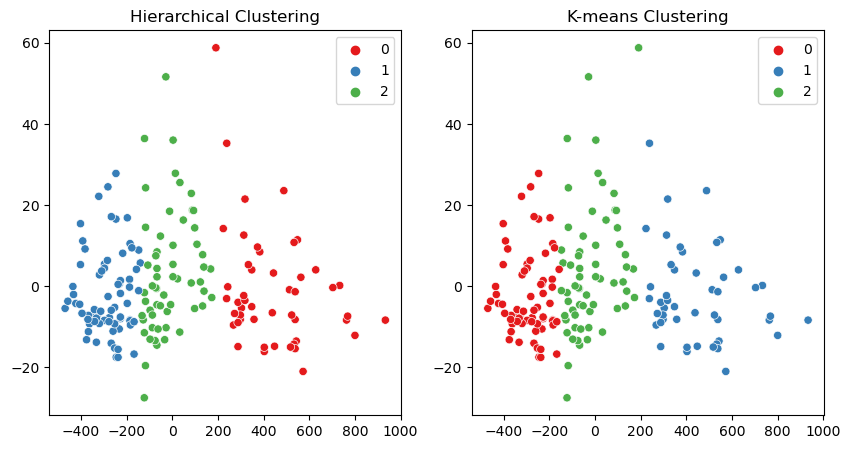

In [10]:
# Plotting the clusters
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=principalComponents[:, 0], y=principalComponents[:, 1], hue=agg_clusters, palette='Set1', legend='full')
plt.title('Hierarchical Clustering')

plt.subplot(1, 2, 2)
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
kmeans.fit(principalComponents)
kmeans_clusters = kmeans.predict(principalComponents)
sns.scatterplot(x=principalComponents[:, 0], y=principalComponents[:, 1], hue=kmeans_clusters, palette='Set1', legend='full')
plt.title('K-means Clustering')

plt.show()